<a href="https://colab.research.google.com/github/semurillas/pregunta_smart_smc/blob/main/fallascircuitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd 

from google.colab import drive
drive.mount('/content/drive')



ModuleNotFoundError: No module named 'pandas'

In [1]:
%pip install --upgrade gspread gspread-dataframe

     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ------------------------------------- 200.9/200.9 kB 11.9 MB/s eta 0:00:00
     --------------------------------------- 11.6/11.6 MB 46.9 MB/s eta 0:00:00
     ---------------------------------------- 181.2/181.2 kB ? eta 0:00:00
     --------------------------------------- 12.9/12.9 MB 59.5 MB/s eta 0:00:00
     ------------------------------------- 505.5/505.5 kB 31.0 MB/s eta 0:00:00
     ------------------------------------- 345.4/345.4 kB 20.9 MB/s eta 0:00:00
     ---------------------------------------- 85.3/85.3 kB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 151.7/151.7 kB ? eta 0:00:00
     ---------------------------------------- 64.9/64.9 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 99.9/99.9 kB ? eta 0:00:00
     ---------------------------------------- 66.9/66.9 kB ? eta 0:00:00
     ---------------------------------------- 121.4/121.4 kB ? e

ERROR: Could not install packages due to an OSError: [WinError 2] El sistema no puede encontrar el archivo especificado: 'c:\\Python311\\Scripts\\f2py.exe' -> 'c:\\Python311\\Scripts\\f2py.exe.deleteme'


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'google'

In [5]:
#df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/indice_saidi.gsheet", sheet_name = "Bd")
#df.head()

spreadsheet = gc.open("indice_saidi")
worksheet = spreadsheet.worksheet("Bd")

data = worksheet.get_all_records()
df = pd.DataFrame(data)
df.head()

,DIRECCION,EQUIPO_OPERO,OWNER,OUTAGE_NO,EVENTOCORTE,EVENTOCIERRE,ANO,MES,APERTURA,CIERRE,...,META SAIFI_DIA REAL,meta SAIDI diaria acumulada,meta SAIfI diaria acumulada,META SAIDI REAL HORAS MES,META SAIFI REAL HORAS MES,META SAIDI SEMANAL,META SAIFI SEMANAL,mayor o igual a 3 min,mas afectados mantto,RECONECTADORES/CB
0,Cra. 11D No. 33B-24,5224250-RI.097,SCADA,189068,197964,197965,2024,1,01/01/2024 05:23:30,01/01/2024 05:23:50,...,0.02,1.7,0.02,0.85,0.67,14.27,0.17,MENOR,NO,Reconectador
1,,01308-SILOE_SWING,SCADA,189069,197966,197969,2024,1,01/01/2024 05:32:35,01/01/2024 05:33:01,...,0.02,1.7,0.02,0.85,0.67,14.27,0.17,MENOR,NO,CB
2,SUBESTACION DIESEL II,5291755-CB04302-ARANJUEZ,SCADA,189070,197970,197971,2024,1,01/01/2024 05:36:23,01/01/2024 05:37:20,...,0.02,1.7,0.02,0.85,0.67,14.27,0.17,MENOR,NO,CB
3,SUBESTACION DIESEL I,5268451-CB03312-OBRERO,SCADA,189071,197972,197973,2024,1,01/01/2024 06:00:31,01/01/2024 06:01:28,...,0.02,1.7,0.02,0.85,0.67,14.27,0.17,MENOR,NO,CB
4,,LineCut - 7505,bomesias,189072,197974,197996,2024,1,01/01/2024 06:05:15,01/01/2024 06:40:00,...,0.02,1.7,0.02,0.85,0.67,14.27,0.17,MAYOR,NO,0.0


In [6]:
print(df.dtypes)

DIRECCION                            object
EQUIPO_OPERO                         object
OWNER                                object
OUTAGE_NO                             int64
EVENTOCORTE                           int64
EVENTOCIERRE                          int64
ANO                                   int64
MES                                   int64
APERTURA                             object
CIERRE                               object
MINUTOS                             float64
HORAS                               float64
COD_CIRCUITO                          int64
CIRCUITO                             object
TRAFOS                                int64
CLASIFICACION                        object
CLIENTES_AFF                          int64
EXCLUSION                            object
CAUSA                                 int64
DESCRIPCION                          object
OBSERVACIONES                        object
TOTAL_CLIENTES                        int64
SAIDI                           

In [7]:
df.describe()

,OUTAGE_NO,EVENTOCORTE,EVENTOCIERRE,ANO,MES,MINUTOS,HORAS,COD_CIRCUITO,TRAFOS,CLIENTES_AFF,...,meta semanal SAIDI min ACUMULADO,SAIFI semana ACUMULADO,META SAIDI_DIA REAL,META SAIFI_DIA REAL,meta SAIDI diaria acumulada,meta SAIfI diaria acumulada,META SAIDI REAL HORAS MES,META SAIFI REAL HORAS MES,META SAIDI SEMANAL,META SAIFI SEMANAL
count,7981.000000,7981.000000,7981.000000,7981.0,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,...,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7.981000e+03,7.981000e+03
mean,205318.053251,209367.895878,209878.904523,2024.0,4.369001,250.313357,4.172595,11678.790753,42.723092,1681.842752,...,216.162792,2.578719,2.044483,0.024333,254.085152,2.993847,4.736082,3.351987,1.427000e+01,1.700000e-01
std,9150.611104,12199.929260,6661.033860,0.0,1.904891,558.925022,9.315116,8305.271223,62.699544,3139.519119,...,102.523947,1.222887,0.339451,0.004956,123.248267,1.441077,2.022699,1.430950,3.552936e-15,8.327194e-17
min,189068.000000,0.000000,197965.000000,2024.0,1.000000,0.000000,0.000000,1304.000000,1.000000,0.000000,...,12.410000,0.150000,1.650000,0.020000,1.700000,0.020000,0.850000,0.670000,1.427000e+01,1.700000e-01
25%,197431.000000,204369.000000,204423.000000,2024.0,3.000000,2.130000,0.040000,4304.000000,1.000000,33.000000,...,148.970000,1.780000,1.790000,0.020000,174.700000,2.050000,3.470000,2.470000,1.427000e+01,1.700000e-01
50%,205839.000000,210034.000000,210068.000000,2024.0,4.000000,84.830000,1.410000,10319.000000,11.000000,166.000000,...,223.460000,2.670000,1.900000,0.020000,272.200000,3.220000,4.540000,3.220000,1.427000e+01,1.700000e-01
75%,213313.000000,215641.000000,215660.000000,2024.0,6.000000,240.880000,4.010000,20302.000000,64.000000,1671.000000,...,297.940000,3.550000,2.130000,0.030000,354.300000,4.130000,6.410000,4.510000,1.427000e+01,1.700000e-01
max,220157.000000,221344.000000,221345.000000,2024.0,8.000000,12171.270000,202.850000,50520.000000,686.000000,26987.000000,...,397.260000,4.740000,2.650000,0.030000,449.300000,5.360000,8.440000,6.160000,1.427000e+01,1.700000e-01


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7981 entries, 0 to 7980
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DIRECCION                         7981 non-null   object 
 1   EQUIPO_OPERO                      7981 non-null   object 
 2   OWNER                             7981 non-null   object 
 3   OUTAGE_NO                         7981 non-null   int64  
 4   EVENTOCORTE                       7981 non-null   int64  
 5   EVENTOCIERRE                      7981 non-null   int64  
 6   ANO                               7981 non-null   int64  
 7   MES                               7981 non-null   int64  
 8   APERTURA                          7981 non-null   object 
 9   CIERRE                            7981 non-null   object 
 10  MINUTOS                           7981 non-null   float64
 11  HORAS                             7981 non-null   float64
 12  COD_CI

In [9]:
df.isna().sum()

,0
DIRECCION,0
EQUIPO_OPERO,0
OWNER,0
OUTAGE_NO,0
EVENTOCORTE,0
EVENTOCIERRE,0
ANO,0
MES,0
APERTURA,0
CIERRE,0


In [10]:
# Contar valores nulos en cada columna
valores_nulos = df.isnull().sum()
print("Valores nulos por columna:\n", valores_nulos)

Valores nulos por columna:
 DIRECCION                           0
EQUIPO_OPERO                        0
OWNER                               0
OUTAGE_NO                           0
EVENTOCORTE                         0
EVENTOCIERRE                        0
ANO                                 0
MES                                 0
APERTURA                            0
CIERRE                              0
MINUTOS                             0
HORAS                               0
COD_CIRCUITO                        0
CIRCUITO                            0
TRAFOS                              0
CLASIFICACION                       0
CLIENTES_AFF                        0
EXCLUSION                           0
CAUSA                               0
DESCRIPCION                         0
OBSERVACIONES                       0
TOTAL_CLIENTES                      0
SAIDI                               0
SAIFI                               0
SAIDI en minutos                    0
SAIDI ACUMILADO en Min

In [11]:
df['MINUTOS'].value_counts().idxmax()

0.33

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

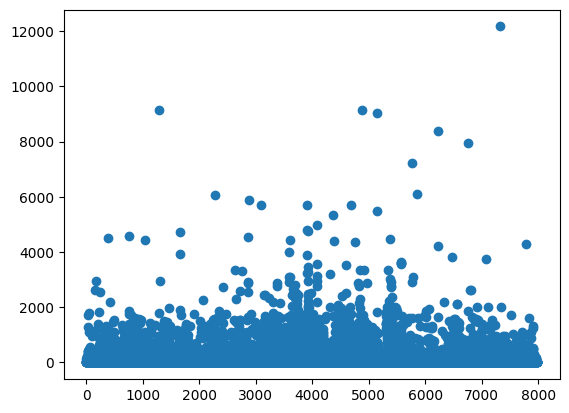

In [13]:
plt.scatter(df.index, df['MINUTOS'])
plt.show

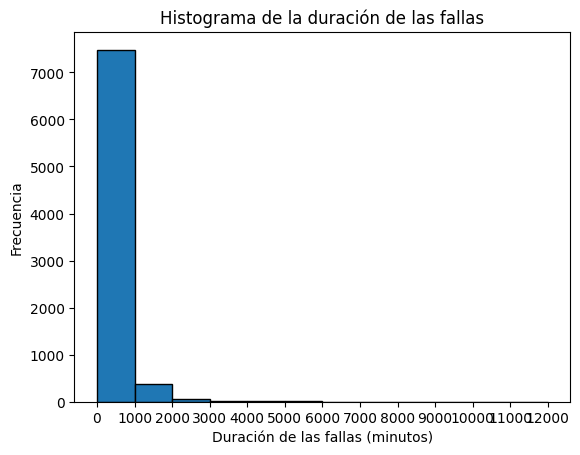

In [14]:
bins = np.arange(0, 13000, 1000)
plt.hist(df['MINUTOS'], bins=bins, edgecolor='black')
plt.title('Histograma de la duración de las fallas')
plt.xlabel('Duración de las fallas (minutos)')
plt.ylabel('Frecuencia')
plt.xticks(bins)
plt.show()

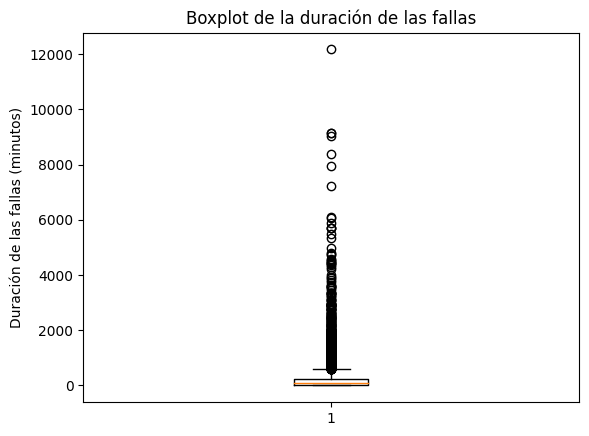

In [15]:
plt.boxplot(df['MINUTOS'])
plt.title('Boxplot de la duración de las fallas')
plt.ylabel('Duración de las fallas (minutos)')
plt.show()

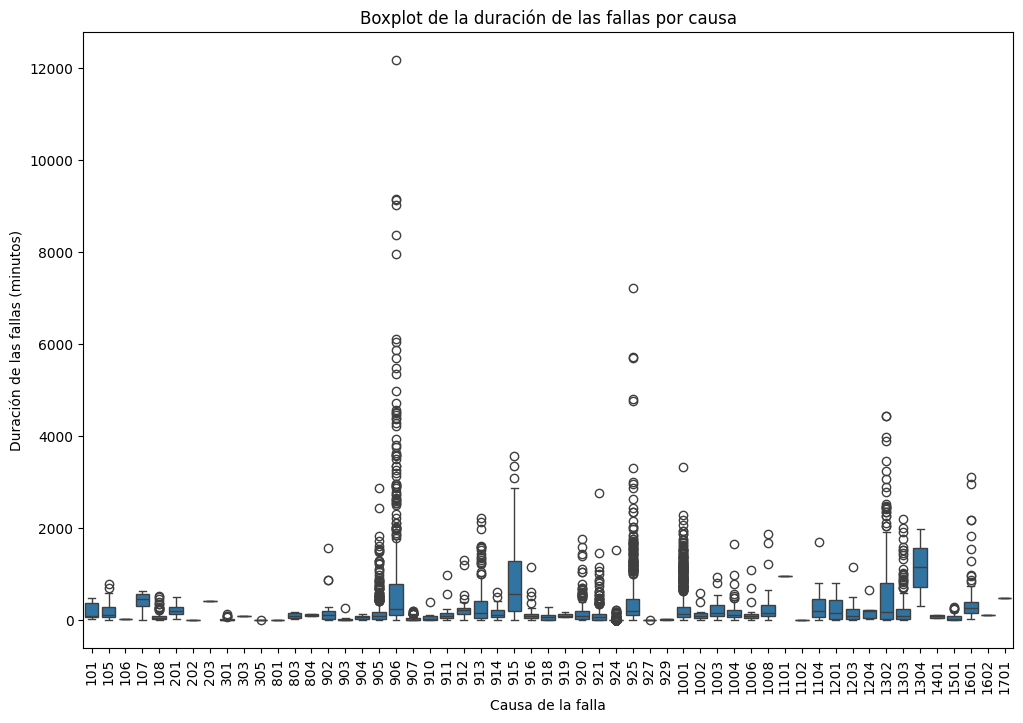

In [16]:
#ANALISIS BIVARIADO ENTRE LAS VARIABLES MINUTOS Y CAUSA
plt.figure(figsize=(12, 8))
sns.boxplot(x='CAUSA', y='MINUTOS', data=df)
plt.title('Boxplot de la duración de las fallas por causa')
plt.ylabel('Duración de las fallas (minutos)')
plt.xlabel('Causa de la falla')
plt.xticks(rotation=90)  # Rotar etiquetas si hay muchas categorías
plt.show()

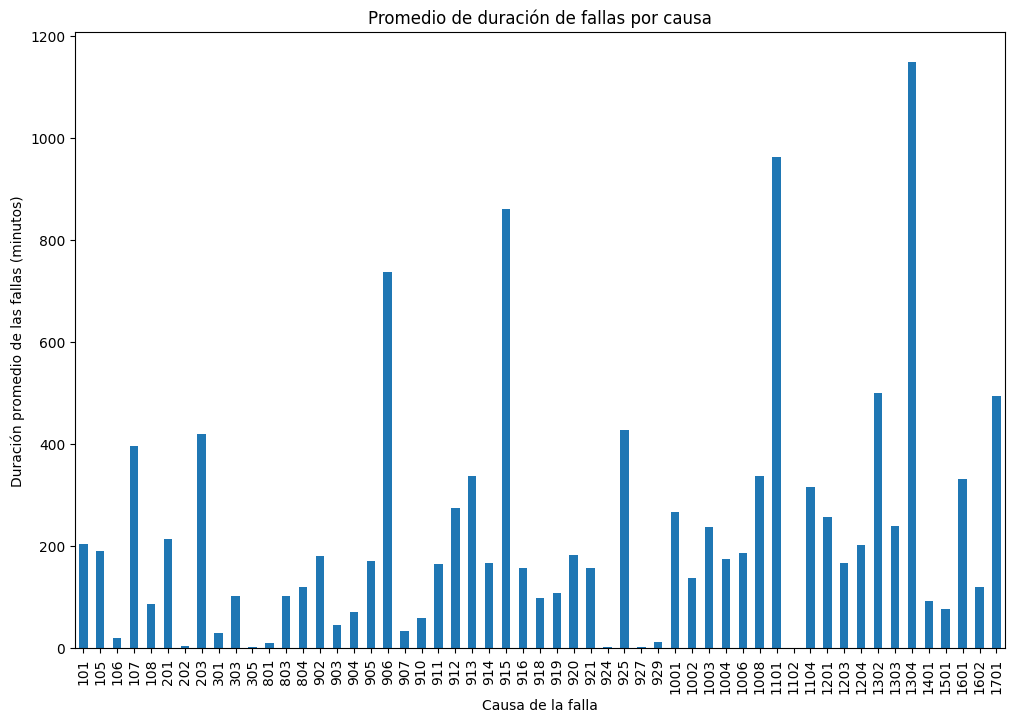

In [17]:
# Gráfico de barras del promedio de duración de fallas por causa
plt.figure(figsize=(12, 8))
df.groupby('CAUSA')['MINUTOS'].mean().plot(kind='bar')
plt.title('Promedio de duración de fallas por causa')
plt.ylabel('Duración promedio de las fallas (minutos)')
plt.xlabel('Causa de la falla')
plt.xticks(rotation=90)
plt.show()

In [18]:
# Aplicar One-Hot Encoding a la columna "CAUSA"
df_encoded = pd.get_dummies(df, columns=['CAUSA'], drop_first=True)

# Verificar las nuevas columnas creadas
df_encoded.head()

,DIRECCION,EQUIPO_OPERO,OWNER,OUTAGE_NO,EVENTOCORTE,EVENTOCIERRE,ANO,MES,APERTURA,CIERRE,...,CAUSA_1203,CAUSA_1204,CAUSA_1302,CAUSA_1303,CAUSA_1304,CAUSA_1401,CAUSA_1501,CAUSA_1601,CAUSA_1602,CAUSA_1701
0,Cra. 11D No. 33B-24,5224250-RI.097,SCADA,189068,197964,197965,2024,1,01/01/2024 05:23:30,01/01/2024 05:23:50,...,False,False,False,False,False,False,False,False,False,False
1,,01308-SILOE_SWING,SCADA,189069,197966,197969,2024,1,01/01/2024 05:32:35,01/01/2024 05:33:01,...,False,False,False,False,False,False,False,False,False,False
2,SUBESTACION DIESEL II,5291755-CB04302-ARANJUEZ,SCADA,189070,197970,197971,2024,1,01/01/2024 05:36:23,01/01/2024 05:37:20,...,False,False,False,False,False,False,False,False,False,False
3,SUBESTACION DIESEL I,5268451-CB03312-OBRERO,SCADA,189071,197972,197973,2024,1,01/01/2024 06:00:31,01/01/2024 06:01:28,...,False,False,False,False,False,False,False,False,False,False
4,,LineCut - 7505,bomesias,189072,197974,197996,2024,1,01/01/2024 06:05:15,01/01/2024 06:40:00,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# Convertir las columnas booleanas generadas por One-Hot Encoding a enteros
df_encoded[df_encoded.columns[df_encoded.columns.str.contains('CAUSA_')]] = df_encoded[df_encoded.columns[df_encoded.columns.str.contains('CAUSA_')]].astype(int)

# Ahora, seleccionar las columnas numéricas nuevamente
df_numeric = df_encoded.select_dtypes(include=['float64', 'int64', 'uint8'])

# Calcular la correlación de "MINUTOS" con las columnas de "CAUSA"
correlaciones_causa_minutos = df_numeric.corr()['MINUTOS'].filter(like='CAUSA')
print(correlaciones_causa_minutos)

CAUSA_105    -0.013387
CAUSA_106    -0.004613
CAUSA_107     0.010585
CAUSA_108    -0.036285
CAUSA_201    -0.006695
CAUSA_202    -0.004919
CAUSA_203     0.003407
CAUSA_301    -0.024682
CAUSA_303    -0.004168
CAUSA_305    -0.011062
CAUSA_801    -0.006796
CAUSA_803    -0.007823
CAUSA_804    -0.005195
CAUSA_902    -0.009192
CAUSA_903    -0.011560
CAUSA_904    -0.005092
CAUSA_905    -0.041507
CAUSA_906     0.266190
CAUSA_907    -0.045803
CAUSA_910    -0.022672
CAUSA_911    -0.007482
CAUSA_912     0.002891
CAUSA_913     0.024557
CAUSA_914    -0.010226
CAUSA_915     0.113514
CAUSA_916    -0.010374
CAUSA_918    -0.008631
CAUSA_919    -0.004895
CAUSA_920    -0.020197
CAUSA_921    -0.028447
CAUSA_924    -0.252784
CAUSA_925     0.098264
CAUSA_927    -0.014007
CAUSA_929    -0.014284
CAUSA_1001    0.013218
CAUSA_1002   -0.009356
CAUSA_1003   -0.001642
CAUSA_1004   -0.018133
CAUSA_1006   -0.005333
CAUSA_1008    0.008841
CAUSA_1101    0.014275
CAUSA_1102   -0.005003
CAUSA_1104    0.008179
CAUSA_1201 

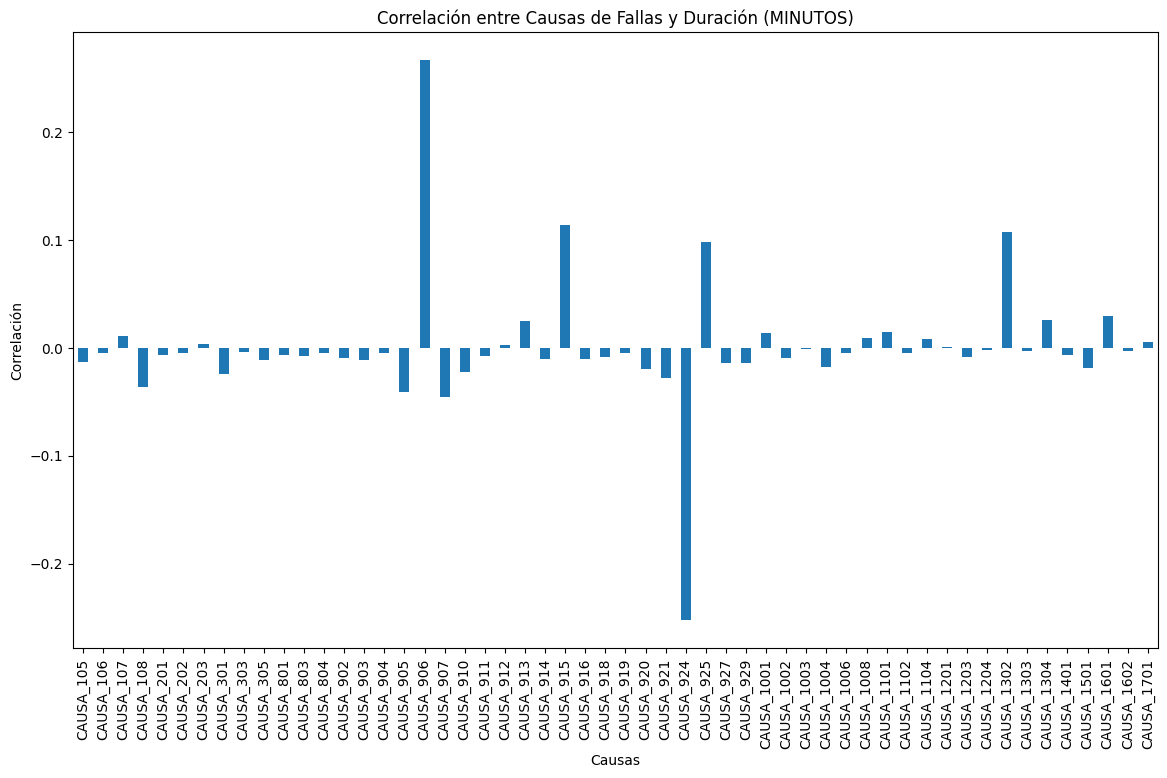

In [20]:
# Visualizar la correlación en un gráfico de barras
correlaciones_causa_minutos.plot(kind='bar', figsize=(14, 8))
plt.title('Correlación entre Causas de Fallas y Duración (MINUTOS)')
plt.ylabel('Correlación')
plt.xlabel('Causas')
plt.show()

In [ ]:
#import numpy as np


#df.replace('', np.nan, inplace=True)  # Reemplaza cadenas vacías por NaN
#df.replace(' ', np.nan, inplace=True)  # Reemplaza espacios en blanco por NaN

In [ ]:
#null_summary = df.isnull().sum()
#null_percentage = (df.isnull().mean() * 100)

#summary_df = pd.DataFrame({'nulos': null_summary, 'porcentaje': null_percentage})
#summary_df